# LightGBM

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
df = pd.read_csv("./data/cleansed.csv" ,encoding = "utf-8")
df = df.drop("Unnamed: 0", axis = 1)
#表示列の増加
pd.set_option('display.max_columns', 162)
df.head()

,Median_Age,Mean_Age,Male,Any_Comorbidity,Fever_temperature_373C,Cough,Chronic_obstructive_lung_COPD,Diabetes,Hypertension,Cardiovascular_Disease_incl_CAD,Fatigue,Other,Shortness_of_Breath_dyspnoea,Smoking_history,BMI,Cancer_Any,Asian,Cerebrovascular_Disease,Diarrhoea,Mortality,Positivenegative_cases_Negative only,Positivenegative_cases_Positive,Positivenegative_cases_Positive Only,Positivenegative_cases_Positive and Negative/Unconfirmed,Positivenegative_cases_Positive only
0,56.0,50.680772,62.30,47.60,94.00,79.00,3.00,19.00,30.00,8.00,23.03,12.00,0.0,5.76,0.0,1.68,100.0,0.0,4.71,0.28,0,0,0,0,1
1,69.0,50.680772,70.37,66.67,94.44,72.22,7.41,31.48,48.15,24.07,27.78,20.37,0.0,9.26,0.0,0.00,100.0,0.0,3.70,1.00,0,0,0,0,1
2,52.0,50.680772,59.12,40.15,94.16,81.75,1.46,13.87,23.36,1.46,21.17,8.03,0.0,4.38,0.0,7.00,100.0,0.0,5.11,0.00,0,0,0,0,1
3,58.0,50.680772,60.30,0.00,91.50,0.00,0.00,11.60,0.00,0.00,0.00,0.00,0.0,0.00,0.0,3.00,100.0,6.5,2.06,0.16,0,0,0,0,1
4,58.0,50.680772,61.60,0.00,89.90,0.00,0.00,10.10,0.00,0.00,0.00,0.00,0.0,0.00,0.0,5.10,100.0,5.1,4.20,0.15,0,0,0,0,1


## 死亡率（Mortality）予測

In [18]:
#LightGBMライブラリ
import lightgbm as lgb
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=4)

#訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_train = train_set.drop('Mortality', axis=1)
y_train = train_set['Mortality']
 
#モデル評価用データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_test = test_set.drop('Mortality', axis=1)
y_test = test_set['Mortality']

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)
#ハイパーパラメータ
params = {'metric': 'rmse',
          'max_depth' : 4}
df.head()

gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=1000,
                verbose_eval=50)

Training until validation scores don't improve for 1000 rounds
[50]	valid_0's rmse: 0.143267
[100]	valid_0's rmse: 0.139117
[150]	valid_0's rmse: 0.136335
[200]	valid_0's rmse: 0.139804
[250]	valid_0's rmse: 0.139764
[300]	valid_0's rmse: 0.141139
[350]	valid_0's rmse: 0.14137
[400]	valid_0's rmse: 0.141841
[450]	valid_0's rmse: 0.142419
[500]	valid_0's rmse: 0.143176
[550]	valid_0's rmse: 0.144039
[600]	valid_0's rmse: 0.14451
[650]	valid_0's rmse: 0.145208
[700]	valid_0's rmse: 0.145433
[750]	valid_0's rmse: 0.146023
[800]	valid_0's rmse: 0.146656
[850]	valid_0's rmse: 0.14723
[900]	valid_0's rmse: 0.147754
[950]	valid_0's rmse: 0.147845
[1000]	valid_0's rmse: 0.148386
[1050]	valid_0's rmse: 0.148961
[1100]	valid_0's rmse: 0.149283
[1150]	valid_0's rmse: 0.149725
Early stopping, best iteration is:
[152]	valid_0's rmse: 0.136054


In [47]:
predicted = gbm.predict(X_test)
for i in range(len(predicted)):
    if predicted[i] < 0:
        predicted[i] = 0
    elif predicted[i] > 1:
        predicted[i] = 1

In [49]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(pred_df['true'], pred_df['pred'])
mae

0.09556651223372563

In [40]:
#関数の処理で必要なライブラリ
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

 
#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    sns.set_style("whitegrid")             # seabornのスタイルセットの一つ
    sns.set_color_codes()     
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    ax.figure.savefig("rmse_r2.png")
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [41]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']
pred_df.head(20)

,true,pred
0,0.01,-0.033273
1,0.00,-0.051148
2,0.12,0.227214
3,0.00,0.089797
4,0.00,0.003048
5,0.00,0.007041
6,0.22,0.070390
7,0.00,0.197539
8,0.01,0.003533
9,0.79,0.847464


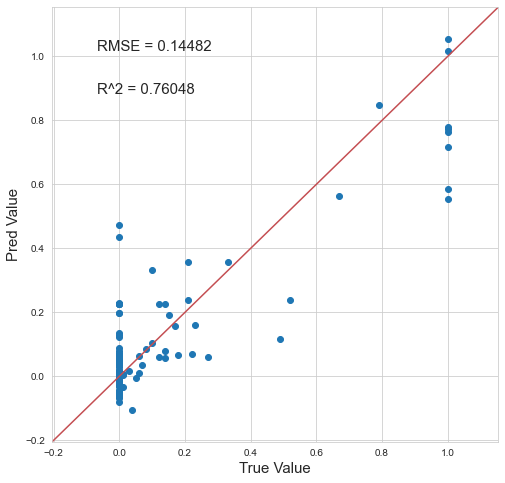

In [43]:
True_Pred_map(pred_df)

#ズレの平均
L = [abs(pred_df.true[i] - pred_df.pred[i]) for i in range(len(pred_df))]
print('ズレの平均', np.mean(L)*100 , '%')
#ズレが50%以上
L2 = [j for j in L if j > 0.5]
print("ズレが50%以上は", len(L2),'個で',L2)

In [24]:
#ズレが50%以上
L2 = [j for j in L if j > 0.5]
L2

[0.5501125493369904]

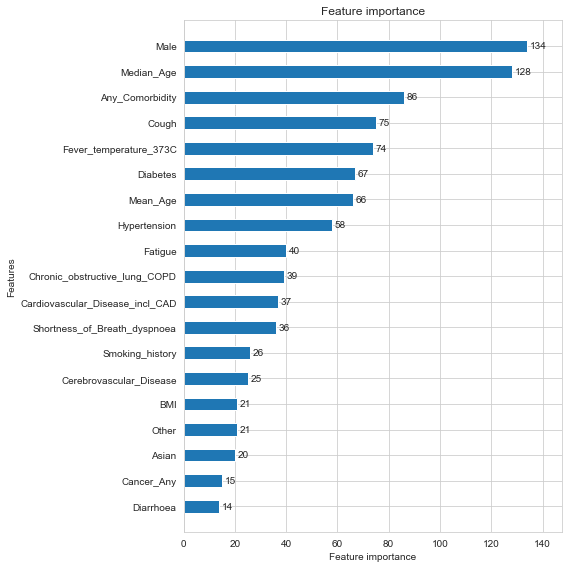

In [33]:
im=lgb.plot_importance(gbm, height=0.5, figsize=(8,8))
im.figure.tight_layout()
im.figure.savefig("importance.png")

In [26]:
# 決定木を可視化
def display_tree(clf):
    ax = lgb.plot_tree(clf, tree_index=0, figsize=(20, 20), show_info=['split_gain'])
    plt.show()
    #print('Plotting tree with graphviz...')
    graph = lgb.create_tree_digraph(clf, tree_index=0, format='png', name='Tree')
    graph.render(view=True)
    plt.savefig('tree.png')

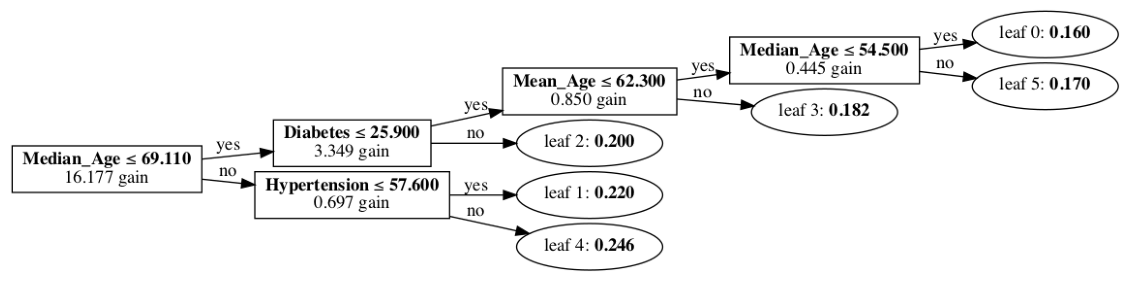

<Figure size 432x288 with 0 Axes>

In [27]:
display_tree(gbm)

In [28]:
RMSE_list = []
count = []
for i in range(1, 10):
    params = {'boosting_type': 'gbdt',
          'objective': 'regression',
          'metric': 'rmse',
          'max_depth' : i}
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100,
                verbose_eval=50)
    
    predicted = gbm.predict(X_test)
    pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
    pred_df.columns = ['true', 'pred']
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    RMSE_list.append(RMSE)
    count.append(i)

Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.191658
[100]	valid_0's rmse: 0.180689
[150]	valid_0's rmse: 0.177839
[200]	valid_0's rmse: 0.176928
[250]	valid_0's rmse: 0.176119
[300]	valid_0's rmse: 0.175731
[350]	valid_0's rmse: 0.175474
[400]	valid_0's rmse: 0.175249
[450]	valid_0's rmse: 0.174462
[500]	valid_0's rmse: 0.174403
[550]	valid_0's rmse: 0.173862
[600]	valid_0's rmse: 0.17391
[650]	valid_0's rmse: 0.173557
[700]	valid_0's rmse: 0.173542
[750]	valid_0's rmse: 0.173258
[800]	valid_0's rmse: 0.173367
[850]	valid_0's rmse: 0.173744
Early stopping, best iteration is:
[762]	valid_0's rmse: 0.173075
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.160407
[100]	valid_0's rmse: 0.151707
[150]	valid_0's rmse: 0.151061
[200]	valid_0's rmse: 0.150924
Early stopping, best iteration is:
[132]	valid_0's rmse: 0.150147
Training until validation scores don't improve for 100 rounds
[50]	valid_0's rmse: 0.148788
[100

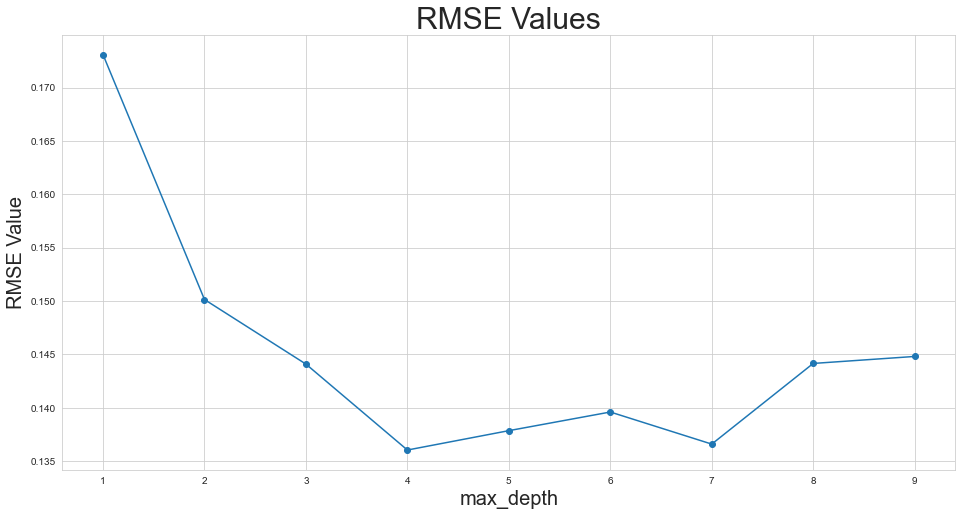

In [29]:
plt.figure(figsize=(16,8))
plt.plot(count, RMSE_list, marker="o")
plt.title("RMSE Values", fontsize=30)
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("RMSE Value", fontsize=20)
plt.grid(True)

## 10/23時点での進捗
- ベストな決定技の深さは**4**
    - 平均誤差は8%程度
    - 大きく外れている値はほとんどない。５０％以上ずれているものは一つ
- 年齢が高く、咳をしていて、熱が高い人が死亡率が高い
- 糖尿病や高血圧

## 今後の方針
- XGBoostで試す
- 死亡率の予測じゃなくて、陽性か陰性の予測をするのはどうか
    - 陰性陽性の予測をしたいがいいデータはないか
    - 今回のデータはほとんとが**陽性**、540中510
- 集団が教師データなため、個人に適用できないのでは
- 次はSCOPを使用した制約最適化に取り組みたい
    - 避難者のデータは仮想のデータを作成する？？
    - 避難所や宿泊施設、病院のデータでいいものはないか
    - 避難所の位置と収容人数は国土交通省のページ

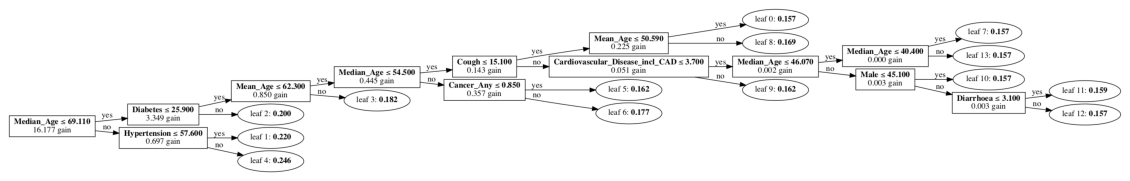

<Figure size 432x288 with 0 Axes>

In [14]:
display_tree(gbm)

## 11/6時点での進捗
- 決定木の可視化をして解釈可能へ
  - dtreevizはLightGBMを解釈できない？xgboostならキチンと動作しそう
    - [エラーメッセージ](https://gyazo.com/ad7c0ba6b34b8e366ff64af54d863827)
    - 元々XGBoostで予測するつもりなので優先度低い
- graphvizを使用してみる
  - きちんと可視化された[リンク](https://user-images.githubusercontent.com/48708621/97990965-1088f880-1e24-11eb-8053-6c1094dfb5be.png)
